<a href="https://colab.research.google.com/github/emmettralston/Fit-Analysis-Ideal-Gas-Data/blob/main/RAD_15_SLDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#upload kaggle.json file
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emmettralston","key":"59bf103e9f5a2015964768b7d8437813"}'}

In [2]:
import os
# Creates Kaggle directory
os.makedirs('/root/.kaggle/', exist_ok=True)

# Moves kaggle.json file to Kaggle directory
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
#Downloads dataset from kaggle
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset
License(s): CC0-1.0
100% 1.24G/1.25G [00:14<00:00, 97.2MB/s]
100% 1.25G/1.25G [00:14<00:00, 90.9MB/s]


In [3]:
!unzip plant-disease-recognition-dataset.zip -d /content/plant-disease-recognition-dataset

Archive:  plant-disease-recognition-dataset.zip
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8ddaa5a5caa5caa8.jpg  
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg  
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8ddd5ec1c0de38c4.jpg  
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8def3f60308ab41b.jpg  
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8def4d91382175c3.jpg  
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8df452e2e38c0b6e.jpg  
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8dfae9d78cc32089.jpg  
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8e3dbccdfe08c850.jpg  
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8e68163c62dc57d5.jpg  
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8e6a8

In [4]:
import os
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Number of images for test, train, and validation
def total_files(folder_path):
  num_files = len([i for i in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, i))])
  return num_files

train_files_healthy = "/content/plant-disease-recognition-dataset/Train/Train/Healthy"
train_files_unhealthy = "/content/plant-disease-recognition-dataset/Train/Train/Rust"


test_files_healthy = "/content/plant-disease-recognition-dataset/Test/Test/Healthy"
test_files_unhealthy = "/content/plant-disease-recognition-dataset/Test/Test/Rust"

validation_files_healthy = "/content/plant-disease-recognition-dataset/Validation/Validation/Healthy"
validation_files_unhealthy = "/content/plant-disease-recognition-dataset/Validation/Validation/Rust"

print('Num of healthy train files:', total_files(train_files_healthy))
print('Num of unhealthy train files:', total_files(train_files_unhealthy))
print()
print('Num of healthy test files:', total_files(test_files_healthy))
print('Num of unhealthy test files:', total_files(test_files_unhealthy))
print()
print('Num of healthy validation files:', total_files(validation_files_healthy))
print('Num of unhealthy validation files:', total_files(validation_files_unhealthy))

Num of healthy train files: 458
Num of unhealthy train files: 434

Num of healthy test files: 50
Num of unhealthy test files: 50

Num of healthy validation files: 20
Num of unhealthy validation files: 20


In [13]:
#Loading Data Sets of Images
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/plant-disease-recognition-dataset/Train/Train",
    image_size=(225, 225),
    batch_size=16,
    seed=15,
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/plant-disease-recognition-dataset/Test/Test",
    image_size=(225, 225),
    batch_size=16,
    seed=15,
)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/plant-disease-recognition-dataset/Validation/Validation",
    image_size=(225, 225),
    batch_size=16,
    seed=15,
)

Found 1322 files belonging to 3 classes.
Found 150 files belonging to 3 classes.
Found 60 files belonging to 3 classes.


In [14]:
#Normalizing data into values between 0 and 1
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))
validation_data = validation_data.map(lambda x, y: (normalization_layer(x), y))

In [15]:
#Compiling the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(225, 225, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 223, 223, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       5,972,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,977,315 (22.80 MB)

 Trainable params: 5,977,315 (22.80 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
83/83 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.4390 - loss: 1.4570 - val_accuracy: 0.5500 - val_loss: 1.0267
Epoch 2/3
83/83 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.7828 - loss: 0.5350 - val_accuracy: 0.6500 - val_loss: 0.8811
Epoch 3/3
83/83 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9020 - loss: 0.2985 - val_accuracy: 0.8000 - val_loss: 0.5201


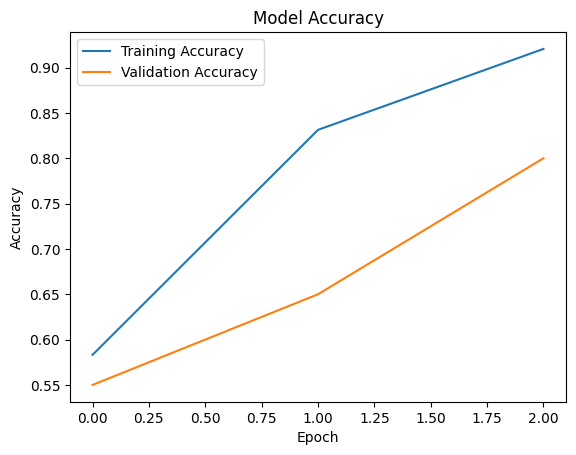

In [20]:
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()
